# Decision Tree 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
import os
os.chdir(r"C:\Users\User\Desktop\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [7]:
# dataset 소환
data = pd.read_csv(r'./breast-cancer-wisconsin.csv')
data

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,target
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [8]:
# y 기준 내림차순 정렬
data.sort_values(by="target", ascending=True, inplace=True)

# index 재설정
data = data.reset_index(drop=True)

In [9]:
data

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,target
0,5,1,1,1,2,1,3,1,1,0
1,5,3,1,1,2,1,1,1,1,0
2,1,1,1,1,1,1,2,1,1,0
3,1,1,1,1,2,1,3,1,1,0
4,4,1,1,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,1,4,3,10,4,10,5,6,1,1
695,10,5,7,3,3,7,3,3,8,1
696,7,2,4,1,3,4,3,3,1,1
697,8,4,7,1,3,10,3,9,2,1


In [10]:
# target data 이름 넣기 #
target_att = 'target'

X = data.loc[:, data.columns != target_att]
y = data.loc[:, data.columns == target_att]

In [11]:
X

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,3,1,1,2,1,1,1,1
2,1,1,1,1,1,1,2,1,1
3,1,1,1,1,2,1,3,1,1
4,4,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
694,1,4,3,10,4,10,5,6,1
695,10,5,7,3,3,7,3,3,8
696,7,2,4,1,3,4,3,3,1
697,8,4,7,1,3,10,3,9,2


In [12]:
# 기존 sklearn에 구현된 모델용 설정 # 

## y의 name 
target_att = 'target'

## x의 name
in_feature = list(data.columns [data.columns != target_att])

## data column 중 categorical variable 찾기
cate_col = [col for col in in_feature if not np.issubdtype(X[col].dtype, \
    np.number)]

## X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X.loc[:,in_feature], columns=cate_col)
feature_names = X_dummies.columns

## y의 string 값을 numeric으로 변환 
y, class_names = pd.factorize(data[target_att])

from sklearn.model_selection import train_test_split  
## train, test = 8:2, random split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2)

In [13]:
feature_names

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bland_Chromatin', 'Normal_Nucleoli',
       'Mitoses', 'Bare_Nuclei_1', 'Bare_Nuclei_10', 'Bare_Nuclei_2',
       'Bare_Nuclei_3', 'Bare_Nuclei_4', 'Bare_Nuclei_5', 'Bare_Nuclei_6',
       'Bare_Nuclei_7', 'Bare_Nuclei_8', 'Bare_Nuclei_9', 'Bare_Nuclei_?'],
      dtype='object')

In [14]:
y, class_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
X_train

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Bare_Nuclei_1,Bare_Nuclei_10,Bare_Nuclei_2,Bare_Nuclei_3,Bare_Nuclei_4,Bare_Nuclei_5,Bare_Nuclei_6,Bare_Nuclei_7,Bare_Nuclei_8,Bare_Nuclei_9,Bare_Nuclei_?
111,3,1,2,1,2,3,1,1,1,0,0,0,0,0,0,0,0,0,0
534,5,10,10,9,6,7,10,5,0,1,0,0,0,0,0,0,0,0,0
671,8,9,9,5,3,7,7,1,0,0,0,0,0,1,0,0,0,0,0
265,4,1,1,1,2,3,1,1,1,0,0,0,0,0,0,0,0,0,0
340,1,1,1,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,10,6,4,1,3,3,2,3,0,0,0,0,1,0,0,0,0,0,0
2,1,1,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0
360,1,1,1,1,10,1,1,1,1,0,0,0,0,0,0,0,0,0,0
505,10,10,8,6,4,8,10,1,0,0,0,0,0,1,0,0,0,0,0


## 여기서 부터 "구현한" 코드에 대한 설명 ##

### 경로설정 ###

In [16]:
import os
os.chdir(r"C:\Users\User\Desktop\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [17]:
os.getcwd()

'C:\\Users\\User\\Desktop\\tree_gain_ratio\\modules'

### 파일 컴파일 ###

In [20]:
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

### 기본 파라미터 설정 및 데이터 스플릿 ###

In [21]:
# DT termination criteria #
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
# -> MAX_DEPTH는 변경불가 
MAX_DEPTH = 1000

sample_ratio = 0.02
min_sample_leaf = round(sample_ratio * len(X_train))

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]

# 추가된 부분1
> 이쪽부터 코드가 추가 되었습니다. 

아래 세 코드는 실제 y의 class별 분포 및 갯수를 확인하기 위함 

In [22]:
# 이 부분 꼭 해주어야함 #
train = train.sort_index()
train

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,target
0,5,1,1,1,2,1,3,1,1,0
1,5,3,1,1,2,1,1,1,1,0
2,1,1,1,1,1,1,2,1,1,0
4,4,1,1,1,2,1,2,1,1,0
6,2,1,3,2,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
693,10,4,6,1,2,10,5,3,1,1
694,1,4,3,10,4,10,5,6,1,1
695,10,5,7,3,3,7,3,3,8,1
697,8,4,7,1,3,10,3,9,2,1


In [23]:
#  실제 데이터의 class별 각 갯수 #
## original y의 class 수 ##

# data y의 이름을 넣으면 됌 #
uni_class = np.unique(data['target'])

class_number = {}
for i in uni_class:    
    class_number[i] = len(data[data['target'] == i])
    
class_number

{0: 458, 1: 241}

In [24]:
# 실제 train 데이터의 class별 각 갯수 #

# data의 y의 이름을 넣으면 됌 #
tra_uni_class = np.unique(train['target'])
tra_class_number = {}
for i in tra_uni_class:    
    tra_class_number[i] = len(train[train['target'] == i])
    
tra_class_number

{0: 368, 1: 191}

### 모델 생성 ###
> min sample leaf, max depth, params(entropy, gini, entropy_GR 중 하나) 순으로 알맞게 넣음

-> simplify는 꼭 True로 설정해주세요.

In [25]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
## simplify: 각 어떤 노드를 기준으로 child node로 분기 했을 때 child node의 분기 예측값이 같다면 분기하지않고 이전 노드를 유지함
# -> simplify는 True로 설정해주세요.

#CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy', simplify=True)
CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='gini', simplify=True)
#CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy_GR', simplify=True)

### 모델 피팅 ###
> train data와 data의 target 이름을 각각 넣음

In [26]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
gini_tree, gini_pprint_tree= CART_gini_ins.fit(train, target_attribute_name = "target")  

In [27]:
## CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
## CART_gini_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_gini_tree, CART_gini_graph_tree = \
                CART_gini_ins.tree, CART_gini_ins.graph_tree   

# 추가된 부분2
> pred, depth, homogeneity, lift, coverage, number_of_variable 수치를 편하게 구할 수 있도록 구현함

In [28]:
## utils.get_usrt_info 코드 설명 ##
# train: data의 train data
# CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
# target_att: data의 y이름

utils.get_usrt_info(train ,CART_gini_tree, target_att = "target")

class prior: [0.6583184257602862, 0.3416815742397138]
leaf node별 class수: [330, 3]
leaf node별 class수: [5, 7]
leaf node별 class수: [15, 4]
leaf node별 class수: [10, 7]
leaf node별 class수: [3, 9]
leaf node별 class수: [1, 22]
leaf node별 class수: [4, 139]


,pred,depth,homogeneity,lift,coverage,number_of_variable
0,0,2,0.991,1.5054,0.596,2
1,1,2,0.583,1.7063,0.021,2
2,0,2,0.789,1.1985,0.034,2
3,1,3,0.972,2.8448,0.256,3
4,1,4,0.957,2.8009,0.041,4
5,0,5,0.588,0.8932,0.030,5
6,1,5,0.750,2.1950,0.021,5


### 그래프 생성 ###
> CART_gini_ins.graph.tree_to_graph에 CART_gini_graph_tree를 넣고 node와 edge에 대한 데이터를 생성한 뒤, \
> node와 edge에 "\n"을 덫붙여서 tree graph를 생성함.

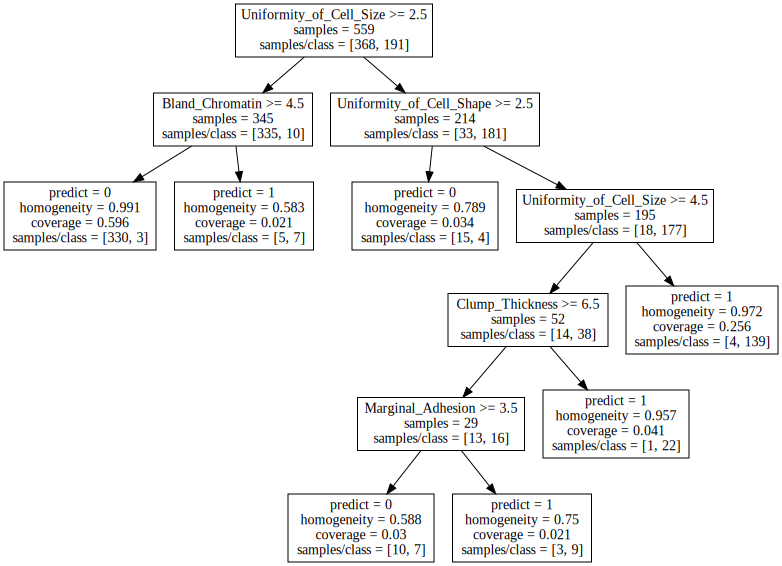

In [29]:
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [ ]:
# PDF 파일 출력 #
graph_dir = 'graph'
split = 'geni'
d_set_name = 'breast-cancer-wisconsin'

tree_graph.render('{}/CART_{}_{}_test'.format(graph_dir, split,d_set_name))

## 성능 측정 ##
> CART_gini_ins.predict에 Dataframe형태의 x,y가 동시에 존재하는 train or test data와 이전에 선언한 CART_entropy_GR_tree를 넣으면, \
> predict, predict probability가 각각 생성됨 

In [30]:
# 성능측정 #
## train predict ##
train = data.loc[train_idx,:]

train_CART_gini_all_pred, train_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(test, CART_gini_tree)

> utils.perform_check에 train or test data의 y값, predict, probability, class의 갯수,  CLASS_DICT_를 넣으면 \
> train or test data의 [accuracy, recall, precision, f1, auc] 순으로 값이 생성 


In [32]:
# y의 name 넣기 
classes = np.unique(train['target'])
 
# train metric
train_CART_gini_all_met = utils.perform_check(train['target'], \
         train_CART_gini_all_pred, \
         train_CART_gini_all_pred_prob,\
         len(classes), CART_gini_ins.CLASS_DICT_)

# test metric
test_CART_gini_all_met = utils.perform_check(test['target'], \
         test_CART_gini_all_pred, \
         test_CART_gini_all_pred_prob, \
         len(classes), CART_gini_ins.CLASS_DICT_)

In [33]:
# [accuracy, recall, precision, f1, auc] 순
train_CART_gini_all_met

[0.9516994633273703,
 0.9267015706806283,
 0.9315789473684211,
 0.9291338582677166,
 0.9805656726610517]

In [34]:
# [accuracy, recall, precision, f1, auc] 순
test_CART_gini_all_met

[0.9428571428571428, 0.92, 0.92, 0.92, 0.9748888888888889]

### [accuracy, recall, precision, f1, auc] 순

In [35]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(train_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.952, RECALL :0.927, PRECISION : 0.932, F1 : 0.929, AUC : 0.981


In [36]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(test_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.943, RECALL :0.92, PRECISION : 0.92, F1 : 0.92, AUC : 0.975


## 구현한 코드 모델과 기존 sklearn 모델과 비교하고 싶으면 아래를 참조해주세요

In [37]:
# split criterion이 gini일 때 #
from sklearn.tree import DecisionTreeClassifier

max_depth = 1000
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dtc =DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf) 

dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

C:\Users\User\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


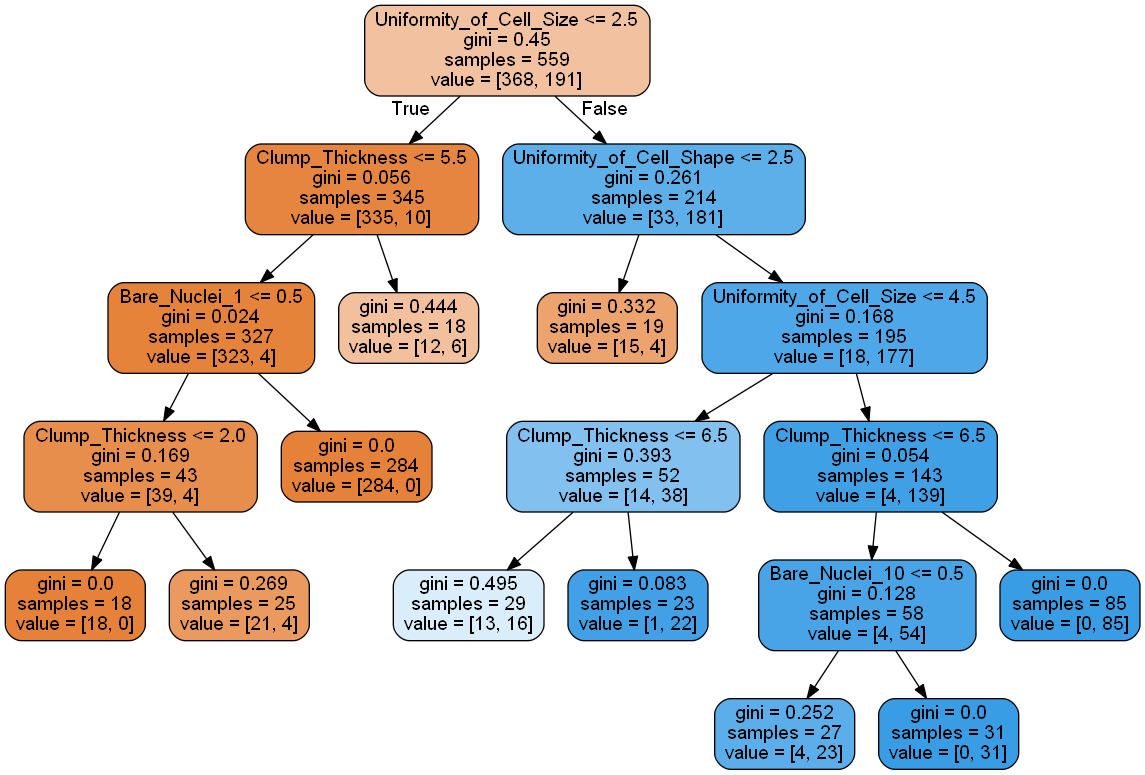

In [39]:
# 문자열 데이터를 저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(dtc, feature_names=X_train.columns, out_file = dot_file, \
                     filled =True, rounded=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())